In [1]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad
from scipy.special import beta, gamma
from scipy import stats as st
import seaborn as sns

In [2]:
# Global configurations
%matplotlib inline
plt.style.use("arviz-darkgrid")
sample_size = 1000

In [3]:
mean = [1, 2, 3]
mat = np.random.randn(3, 3) + 2
cov = mat @ mat.T
samples = np.random.multivariate_normal(mean=mean, cov=cov, size=1000)
df = pd.DataFrame(samples, columns=["Variable 1", "Variable 2", "Variable 3"])

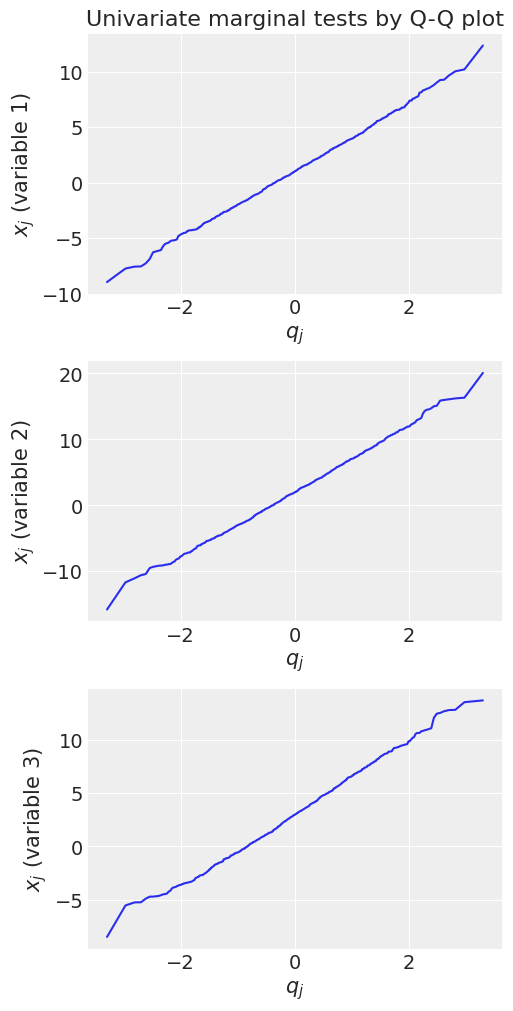

In [4]:
# Univariate marginal tests
fig, axes = plt.subplots(3, 1, figsize=(5, 10))
for i in range(3):
    ordered_data = np.sort(samples[:, i])
    n = ordered_data.shape[0]
    q_js = list()
    for j in range(1, n+1):
        q_js.append(st.norm.ppf((j-(1/2))/n))

    axes[i].plot(q_js, ordered_data)
    axes[i].set_xlabel(r"$q_j$")
    axes[i].set_ylabel(f"$x_j$ (variable {i+1})")

axes[0].set_title("Univariate marginal tests by Q-Q plot")
plt.show()

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self.fig.tight_layout(*args, **kwargs)


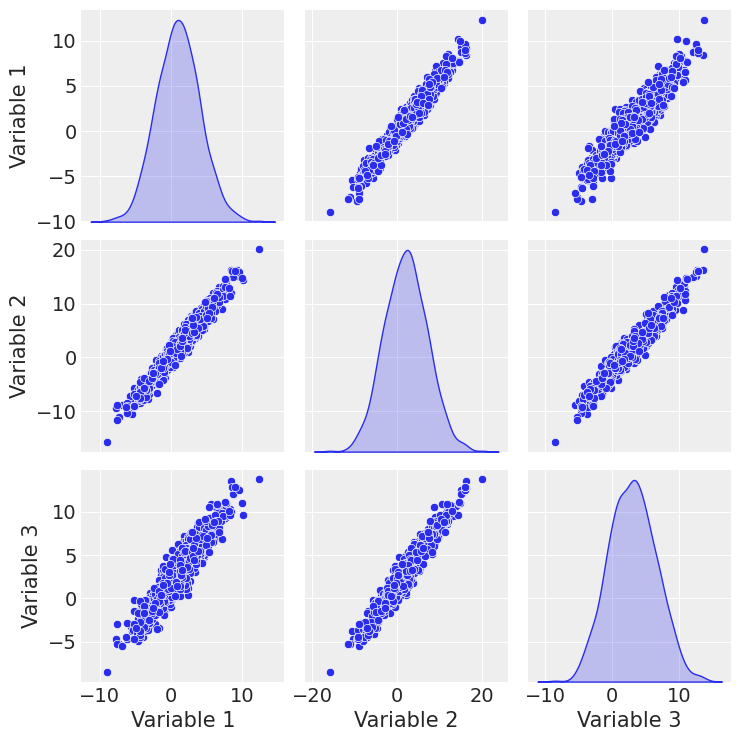

In [5]:
# Bivariate tests
sns.pairplot(df, diag_kind="kde")
plt.show()

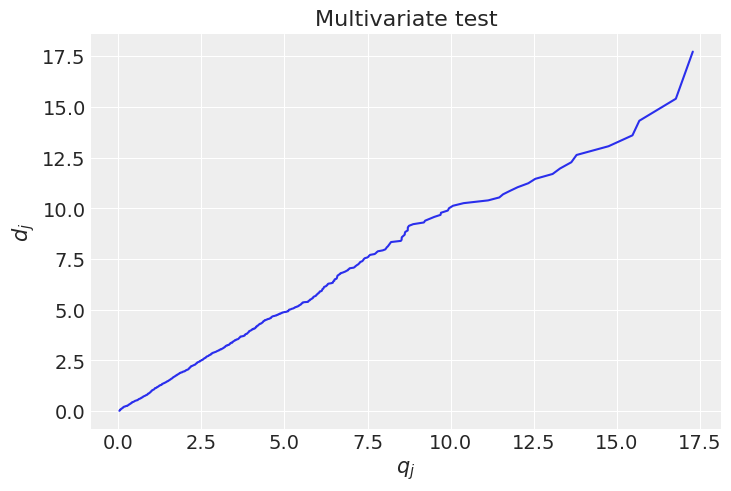

In [6]:
# Multivariate normality tests
mean = np.array(mean).reshape(-1, 1)
d_js = list()
for row in samples:
    row = row.reshape(-1, 1)
    dj = (row - mean).T @ np.linalg.inv(cov) @ (row - mean)
    d_js.append(np.squeeze(dj))
    
d_js = np.sort(np.array(d_js))
q_js = list()
for j in range(1, n+1):
    q_js.append(st.chi2.ppf(((j-(1/2))/n), 3))

plt.plot(d_js, q_js)
plt.xlabel(r"$q_j$")
plt.ylabel(f"$d_j$")
plt.title("Multivariate test")
plt.show()

### Conclusion - 
1. The Q-Q plots looks linear for all three variables. So, we can say that all three variables are normally distributed.
2. In bivariate analysis, the correlation is evident by ellipses and the variables seem to follow multivariate distribution.
3. The multivariate tests are also satisfied. Conclusion, the data comes from multivariate distribution.